In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from tqdm.auto import tqdm


In [2]:
sys.path.append('..')

auto6 = pd.read_csv('../CSV/auto_experiment_6.csv')
cyber6 = pd.read_csv('../CSV/cyber_experiment_6.csv')
env6 = pd.read_csv('../CSV/env_liab_experiment_6.csv')
auto7 = pd.read_csv('../CSV/auto_experiment_7.csv')
cyber7 = pd.read_csv('../CSV/cyber_experiment_7.csv')
env7 = pd.read_csv('../CSV/env_liab_experiment_7.csv')
autoA = pd.read_csv('../CSV/auto_experiment_A.csv')
cyberA = pd.read_csv('../CSV/cyber_experiment_A.csv')
autoC = pd.read_csv('../CSV/auto_experiment_C.csv')
cyberC = pd.read_csv('../CSV/cyber_experiment_C.csv')
envC = pd.read_csv('../CSV/env_liab_experiment_C.csv')
autoD = pd.read_csv('../CSV/auto_experiment_D.csv')
cyberD = pd.read_csv('../CSV/cyber_experiment_D.csv')
envD = pd.read_csv('../CSV/env_liab_experiment_D.csv')
autoH = pd.read_csv('../CSV/auto_experiment_H.csv')
cyberH = pd.read_csv('../CSV/cyber_experiment_H.csv')
envH = pd.read_csv('../CSV/env_liab_experiment_H.csv')
experiment_dataset = pd.concat([auto6, cyber6, env6, auto7, autoA, autoC, autoD, cyber7, cyberA, cyberC, cyberD, env7, envC, envD, autoH, cyberH,envH], axis=0, ignore_index=True)
experiment_dataset = experiment_dataset.drop(['Model','Experiment Index','Top SHAP Features'], axis=1)

In [6]:
experiment_dataset

,Sample Size,R²,MAE,RMSE,Accuracy,Explained Variance,MedAE,Max Error,RAE,sMAPE,Bias,PICP,CV,Quantile Loss,Durbin-Watson,SHAP Match Percentage
0,100,0.570297,119.011469,155.341529,0.606349,0.606349,108.002350,428.541626,0.608599,10.749712,-44.995258,0.950000,0.193547,59.505734,1.754517,80.0
1,1000,0.953035,51.880120,80.322931,0.953241,0.953241,30.069427,358.467163,0.181567,5.059632,-5.324880,1.000000,0.340653,25.940060,2.139694,100.0
2,2000,0.976279,39.310746,63.264256,0.976329,0.976329,22.645752,402.852295,0.119613,3.506260,-2.906742,1.000000,0.369233,19.655373,1.849049,100.0
3,5000,0.963523,44.083405,67.485145,0.963637,0.963637,27.883057,457.338989,0.156646,4.453014,3.781939,1.000000,0.333495,22.041702,1.908242,100.0
4,100,0.872952,91.659909,116.472195,0.877903,0.877903,63.895874,259.293701,0.331795,10.322445,22.990469,1.000000,0.261223,45.829955,2.333753,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15154,9600,0.948241,16278.311653,27012.247954,0.948291,NaN,10062.729922,215903.122500,0.177261,19.334085,-838.636911,0.999583,0.709495,8139.155827,1.992049,100.0
15155,33600,0.956546,14707.585315,25101.887340,0.956546,NaN,8533.677031,340432.697500,0.157627,18.053009,-12.300637,0.999405,0.726253,7353.792658,1.980806,100.0
15156,44000,0.961221,14260.273047,23514.742803,0.961225,NaN,8698.891328,247549.661250,0.153820,18.398304,-231.680438,0.999909,0.742223,7130.136524,2.001151,100.0
15157,52800,0.962162,13764.647840,23320.450543,0.962164,NaN,8136.222344,243316.328750,0.148494,17.367607,142.789994,0.999773,0.735851,6882.323920,2.022505,100.0


In [7]:
import pandas as pd

# Assuming your original dataset is stored in a DataFrame called 'df'
# If it's not, you'll need to load your data first:
# df = pd.read_csv('your_data_file.csv')

# Extract unique sample sizes and count rows
sample_size_counts = experiment_dataset['Sample Size'].value_counts().sort_index()

# Create a new DataFrame with the results
new_df = pd.DataFrame({
    'Sample Size': sample_size_counts.index,
    'Number of Rows': sample_size_counts.values
})

# Sort by Sample Size
new_df = new_df.sort_values('Sample Size')


In [9]:
print(new_df)

    Sample Size  Number of Rows
0           100            3000
1          1000            3000
2          2000            3000
3          5000            3000
4          8000             350
5          9600             300
6         10000               3
7         32000             300
8         33600             300
9         40000             350
10        44000             300
11        48000             300
12        50000               3
13        52800             300
14        80000             350
15        96000             300
16       100000               3


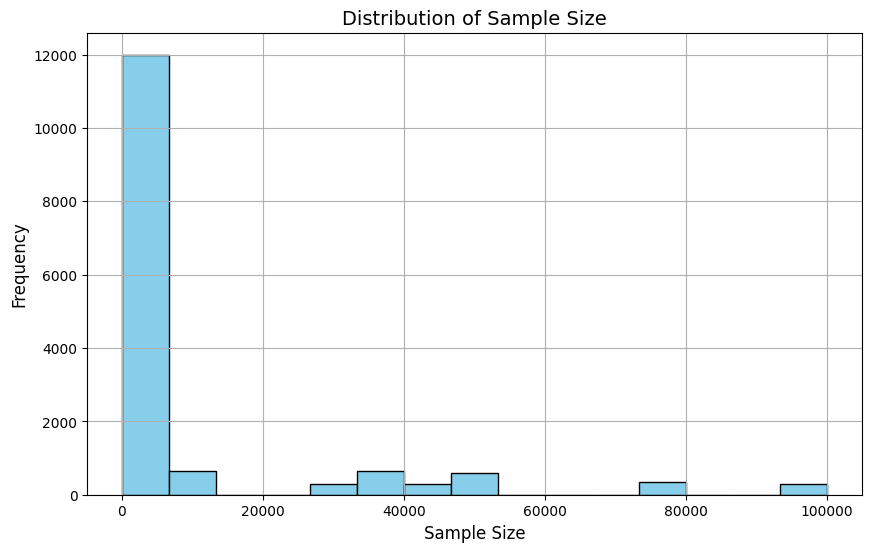

In [5]:
# Create a clearer histogram with larger bins for readability
plt.figure(figsize=(10, 6))
plt.hist(experiment_dataset['Sample Size'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Size', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap of numerical columns
numeric_columns = experiment_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = experiment_dataset[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [28]:
experiment_dataset = experiment_dataset.drop(['RMSE','MAE','Explained Variance', 'Accuracy','RAE','sMAPE','Quantile Loss','MedAE'], axis=1)

In [ ]:
numeric_columns = experiment_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = experiment_dataset[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [31]:
X = experiment_dataset.drop(['SHAP Match Percentage'], axis=1)
y = experiment_dataset['SHAP Match Percentage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, threshold=5.0):
    correct_predictions = np.abs(y_true - y_pred) <= threshold
    precision = np.mean(correct_predictions)
    accuracy = np.sum(correct_predictions) / len(y_true)
    return {
        'R²': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'Precision': precision,
        'Accuracy': accuracy
    }

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(random_state=42)
}

# Hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'model__alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20]},
    'Gradient Boosting': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']},
    'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 5]}
}

# Test models with cross-validation and hyperparameter tuning
results = {}
for name, model in tqdm(models.items(), desc="Training Models"):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.predict(X_test)
    results[name] = calculate_metrics(y_test, y_pred)
    results[name]['Best Parameters'] = grid_search.best_params_
    results[name]['Cross-Val R²'] = np.mean(cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='r2'))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).T

# Display the DataFrame nicely formatted
results_df_formatted = results_df.style.set_caption("Model Testing Results").format("{:.4f}", subset=["R²", "MAE", "RMSE", "Precision", "Accuracy", "Cross-Val R²"])

# Return the DataFrame as the output
results_df_formatted

In [ ]:
# Determine the best model based on Cross-Val R²
best_model = max(results, key=lambda x: results[x]['Cross-Val R²'])
print(f"\nBest model based on Cross-Val R²: {best_model}")
print(f"Best Cross-Val R²: {results[best_model]['Cross-Val R²']:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_r2_accuracy_comparison(results):
    # Extract R² and Accuracy from results
    data = {
        'Model': list(results.keys()),
        'R²': [results[model]['R²'] for model in results],
        'Accuracy': [results[model]['Accuracy'] for model in results]
    }
    df = pd.DataFrame(data)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars
    bar_width = 0.35
    index = range(len(df['Model']))
    ax.bar(index, df['R²'], bar_width, label='R²', color='blue', alpha=0.7)
    ax.bar([i + bar_width for i in index], df['Accuracy'], bar_width, label='Accuracy', color='green', alpha=0.7)

    # Customize the plot
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title('R² and Accuracy Comparison Across Models', fontsize=16)
    ax.set_xticks([i + bar_width/2 for i in index])
    ax.set_xticklabels(df['Model'], rotation=45, ha='right')
    ax.legend()

    # Add value labels on the bars
    for i, v in enumerate(df['R²']):
        ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')
    for i, v in enumerate(df['Accuracy']):
        ax.text(i + bar_width, v, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    #plt.savefig('r2_accuracy_comparison.png', dpi=300)
    plt.close()

plot_r2_accuracy_comparison(results)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
    'reg_lambda': [0.5, 1.0, 1.5]     # L2 regularization
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   cv=5, 
                                   verbose=1, 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the new metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized XGBoost: RMSE = {rmse:.2f}, R² = {r2:.2f}")